In [3]:
##Map GoogleDrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
##Create dataframe
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/suptransformed_01.csv')

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,344.5980,35602.004286,582.276667,1.483681,0.312208,4.837583,2374.380714,55.344680,1.00330,162.214714,2947.078025,243.5325,0.328829,0.068158
1,344.0895,35555.397143,582.358333,1.482043,0.311847,4.838300,2371.790000,55.286400,1.00155,162.193000,2945.711900,243.3300,0.328563,0.068217
2,343.0095,35488.287500,580.540000,1.479259,0.311006,4.822080,2365.590000,55.026050,0.99750,161.829143,2933.232000,242.3475,0.327497,0.068025
3,342.3250,35423.490000,578.912000,1.473527,0.310676,4.813450,2360.505714,54.940950,0.99100,161.485000,2925.073700,242.0740,0.326406,0.067936
4,342.7115,35453.218571,578.955000,1.472372,0.311004,4.815560,2362.864536,54.868383,0.99145,161.433333,2928.523500,241.9880,0.326623,0.067961


In [6]:
from sklearn.feature_selection import mutual_info_regression
X = df.copy()

with open('/content/gdrive/MyDrive/Colab Notebooks/file.csv', 'w') as f:
  for n in range(len(X.columns) - 1):
    con_n = str(n)
    mi_scores = mutual_info_regression(X, X.pop(con_n), discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    print(mi_scores)
    f.write(str(mi_scores))
  f.close()

1     2.375958
2     2.309936
3     2.408079
4     2.063432
5     2.146038
6     2.488114
7     2.159324
8     2.071552
9     2.247596
10    2.118193
11    1.988765
12    2.159065
13    2.450924
Name: MI Scores, dtype: float64
2     2.411067
3     2.356270
4     2.166861
5     2.220386
6     2.669283
7     2.153702
8     2.069302
9     2.345730
10    2.057839
11    2.147174
12    2.202202
13    2.517804
Name: MI Scores, dtype: float64
3     2.389001
4     2.093241
5     2.349837
6     2.464653
7     2.238979
8     2.127083
9     2.613021
10    2.119438
11    2.021280
12    2.375220
13    2.509138
Name: MI Scores, dtype: float64
4     2.171785
5     2.185080
6     2.519814
7     2.207552
8     2.186006
9     2.324350
10    2.135136
11    1.997491
12    2.200681
13    2.541126
Name: MI Scores, dtype: float64
5     1.892831
6     2.182913
7     2.200863
8     1.873843
9     1.961483
10    1.918803
11    1.781706
12    1.986872
13    2.199504
Name: MI Scores, dtype: float64
6     2.278798


In [7]:
from sklearn.feature_selection import mutual_info_regression as mi_reg
import numpy as np

df.head()

def calculate_mutual_information(data):
  corr = pd.DataFrame();
  indep_vars = data.columns
  dep_vars = data.columns
  dep_var = 0
  i=0 ##i is used to track execution of the code
  for dep_var in dep_vars:
    i = i + 1
    print(i)
    result = mi_reg(data[indep_vars], data[dep_var])
    corr[dep_var] = result.tolist()
  corr.columns = data.columns
  corr.index = data.columns
  corr.to_csv("/content/gdrive/MyDrive/Colab Notebooks/crypto_mi.csv")
  print(corr.head())
  
calculate_mutual_information(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
           0          1          2          3          4         5         6  \
0  10.533707   2.375977   2.309942   2.408065   2.063452  2.146035  2.488125   
1   2.375960  10.620180   2.411078   2.356273   2.166861  2.220375  2.669282   
2   2.309936   2.411074  10.530067   2.389037   2.093236  2.349800  2.464663   
3   2.408051   2.356271   2.389042  10.618297   2.171785  2.185075  2.519806   
4   2.063439   2.166862   2.093249   2.171785  10.593457  1.892829  2.182912   

          7         8         9        10        11        12        13  
0  2.159311  2.071611  2.247610  2.118185  1.988760  2.159073  2.450944  
1  2.153705  2.069414  2.345732  2.057839  2.147209  2.202204  2.517784  
2  2.238980  2.127034  2.613015  2.119449  2.021253  2.375247  2.509128  
3  2.207541  2.185976  2.324348  2.135134  1.997454  2.200678  2.541089  
4  2.200863  1.873772  1.961494  1.918795  1.781678  1.986872  2.199500  


In [8]:
#Reading maximum value in the datafield/file
import numpy
dfx=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/crypto_mi.csv')
dfx.pop('Unnamed: 0')
dfx.head()
max = dfx.max(numeric_only=True).max()
print(max)

#Subtract every cell value from max
values = numpy.array(dfx)
array = abs((values - max))
#print(values)
#print(abs(values - max))

#New dataframe that has the final array for the minimum spanning tree
#Export the dataframe to file
dfy = pd.DataFrame(data=array)
dfy.to_csv("/content/gdrive/MyDrive/Colab Notebooks/final_array.csv")
dfy.head()

10.620179827750032


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.086472,8.244203,8.310238,8.212115,8.556728,8.474145,8.132055,8.460869,8.548569,8.372570,8.501995,8.631419,8.461107,8.169235
1,8.244220,0.000000,8.209102,8.263907,8.453318,8.399805,7.950898,8.466475,8.550766,8.274448,8.562341,8.472971,8.417976,8.102396
2,8.310244,8.209106,0.090113,8.231143,8.526944,8.270380,8.155517,8.381200,8.493146,8.007165,8.500731,8.598926,8.244933,8.111051
3,8.212128,8.263909,8.231138,0.001883,8.448394,8.435105,8.100374,8.412639,8.434204,8.295831,8.485046,8.622725,8.419501,8.079091
4,8.556741,8.453318,8.526931,8.448395,0.026723,8.727351,8.437268,8.419317,8.746408,8.658686,8.701385,8.838502,8.633308,8.420680


  (0, 6)	8.132054670075432
  (2, 12)	8.244933059153436
  (2, 13)	8.111051399650965
  (4, 7)	8.41931664437894
  (5, 2)	8.270352625748275
  (6, 1)	7.950895584257668
  (6, 7)	8.291243765526122
  (6, 10)	8.22828701827305
  (8, 13)	8.339941660381696
  (9, 2)	8.007160308143074
  (11, 1)	8.47294699079946
  (13, 3)	8.0790814305756
  (13, 6)	8.018917513590925


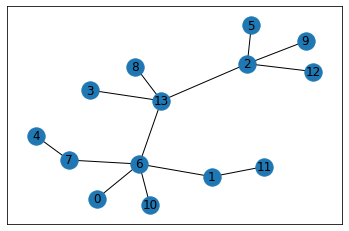

In [9]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

X=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/final_array.csv')
X.pop('Unnamed: 0')
X.head()

#Generate values for the minimum spanning tree of the datafield
Tcsr = minimum_spanning_tree(X)
Tcsr.toarray().astype(float)

#Plot the minimum spanning tree
print(Tcsr)
MST = nx.Graph(Tcsr.toarray().astype(float))
nx.draw_networkx(MST, with_labels=True)